In [2]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
#Data Frame
df = pd.read_csv("data/train.csv")

In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
df.shape

(891, 12)

In [6]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

### How representative is the sample? 

Percentage of survived passengers at Titanic was 37%

In [12]:
print "Survived percentage of sample:"
p_survived = 342/(891.0)
print p_survived

Survived percentage of sample:
0.383838383838


Lets verify that the sample mean is close enough to the popuilation mean
<li> Survived is a binary Random Variable.
<li> Lets say H0 is m = 37%, H1 is m =! 37% (Both sided test)
<li> As a Test Statistic we get:

In [13]:
((p_survived - 0.37) / (0.37*(1-0.37)))* np.sqrt(891)

1.7720743975612849

<li> The critical value with a significance level of 5% is Z = 1.960 (see 1-0.05/2 in normal distribution).
<li> As 1,7720 is not higher than 1.960, we keep our H0. => The sample is fine

## Explorative Datenanalyse (EDA)

### What to do?

<li> check for missing values
<li> what data type are the features? continuous, discrete?
<li> if continuous: Mix, max, std, mean etc. What is the distribution?
<li> if discrete: Which characteristics are there?


### After Preprocessing: Strategies for Solving?

#### Which Variables are important?
<li> IMPORTANT: Pclass, Sex, Age, #Siblings, Fare$, 
<li> MAYBE Useful (real significance need to be explored): Parch, embarked (research on the cities during that time), cabin (correlation with fare?), ticket number (correlation with fare and or cabin?) 	
<li> Likely NOT Useful: PassengerID, Name



#### Which Models can be used, make sense?
<li> Ensemble Learning (Adding weak Classifiers) => Random Forest / Ada Boost?
<li> Neural Net (How to map the Variables to a funtion? Does that even makes sense?)

### Missing values:

In [14]:
# missing values at Survived
df[df.Survived.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [15]:
# missing values at Pclass
df[df.Pclass.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [16]:
# missing values at Name
df[df.Name.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [17]:
# missing values at Sex
df[df.Sex.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [18]:
# missing values at Age
# df[df.Age.isnull()]
#177 Missing values... We need to deal with those as age is a important value

# Fix? Possible options are taking the mean age, or training an own classifier for predicting the age
# For this problem taking the mean age might be good enough.
#Fix:
avgAge = df.Age.mean()  # => 29.6991176471
df.Age = df.Age.fillna(value=avgAge)
df[df.Age.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [19]:
# missing values at SibSp
df[df.SibSp.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [20]:
# missing values at Parch
df[df.Parch.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [36]:
# missing values at Ticket
df[df.Parch.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked


In [34]:
# missing values at Fare
df[df.Fare.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked


In [24]:
# missing values at Cabin
# df[df.Cabin.isnull()]
# 687 Missing values. Thats 77% ... Delete the whole Variable?
# First this might be a good approach, as we have passenger Fare and ticket number for similar deductions
# df.drop("Cabin", axis=1, inplace=True)
# Commented out because cabin cant be deleted twice

In [35]:
# missing values at Embarked
# df[df.Embarked.isnull()]
# Only two missing values. Online Research: 
# "https://www.encyclopedia-titanica.org/titanic-survivor/amelia-icard.html"
# "https://www.encyclopedia-titanica.org/titanic-survivor/martha-evelyn-stone.html"
# Both Embarked at Southampton! => S
# Fix:
#df.set_value(61, 'Embarked', 'S')
#df.set_value(829, 'Embarked', 'S')
df[df.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked


## Check Datatypes

### Survived 

In [28]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

### Pclass

In [113]:
df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

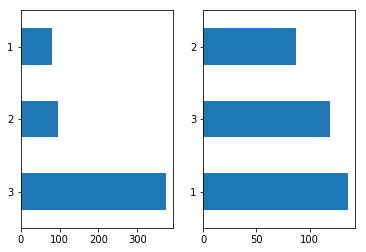

In [123]:
fig, axs = plt.subplots(1,2) 

df[(df.Survived==0)].Pclass.value_counts().plot(kind='barh', ax=axs[0])
df[(df.Survived==1)].Pclass.value_counts().plot(kind='barh', ax=axs[1])

In [ ]:
df[(df.Survived==0) & (df.Sex=="male")].Pclass.value_counts().plot(kind='barh')

In [37]:
df[df.Pclass==0]
# not dividing up in the three classes... 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked


### Sex

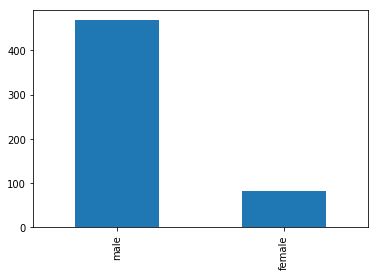

In [114]:
df[df.Survived==0].Sex.value_counts().plot(kind="bar")

In [74]:
# Need to cast Sex into numerical values.
# male: 0
# female: 1
df['Sex'].replace('male', 0, inplace=True)
df['Sex'].replace('female', 1, inplace=True)

### SibSp

In [22]:
df.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

### Parch

In [23]:
df.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

### Embarked

In [72]:
df.Embarked.value_counts()
# Need to cast S, C and Q to numeric values, to fit it for the classifier
# C -> 1
# Q -> 2
# S -> 3
#df['Embarked'].replace('C', '1', inplace=True)
#df['Embarked'].replace('Q', '2', inplace=True)
#df['Embarked'].replace('S', '3', inplace=True)


3    646
1    168
2     77
Name: Embarked, dtype: int64

### Age and Fare

In [25]:
continuousVariables = df.describe()
del continuousVariables['PassengerId']
del continuousVariables['Survived']
del continuousVariables['Pclass']
continuousVariables
#Although Parch and SibSp are discrete Variables, it can be useful to know the mean, std etc. So I kept it in the DataFrame. 

,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,13.002015,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,7.910400
50%,29.699118,0.000000,0.000000,14.454200
75%,35.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


# First Model

## Drop variables: PassengerId, Name and Ticket

In [40]:
# No missing values, but not sure what to do with the variable. Maybe the Letter offers some insight, but these are maybe
# also possible with the variable fare. For know i will drop the variable.
#df.drop("Ticket", axis=1, inplace=True)

# I assume no special order and therefore not relevance
#df.drop("PassengerId", axis=1, inplace=True)

# I feel very strongly that name has no impact on surviving the Titanic ;)
df.drop("Name", axis=1, inplace=True)


In [42]:
# Popping off the variable survived of the DataFrame
surv = df.pop("Survived")

### Random Forrest Classifier

In [180]:
#import random forest
from sklearn.ensemble import RandomForestClassifier
test = pd.read_csv("data/test.csv")

forest = RandomForestClassifier(n_estimators=100)
forest.fit(df, surv)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [181]:
# adjust test data
test.drop(["Name", "PassengerId", "Ticket", "Cabin"], axis=1, inplace=True)
test['Embarked'].replace('C', '1', inplace=True)
test['Embarked'].replace('Q', '2', inplace=True)
test['Embarked'].replace('S', '3', inplace=True)
test['Sex'].replace('male', 0, inplace=True)
test['Sex'].replace('female', 1, inplace=True)
test.Age = test.Age.fillna(value=avgAge)
avgFare= test.Fare.mean()
test.Fare = test.Fare.fillna(value=avgAge)

In [182]:
testData = pd.read_csv("data/test.csv")
ids = testData.pop("PassengerId")
prediction = forest.predict(test)
submission = pd.DataFrame({'PassengerId': ids, 'Survived': prediction})

In [187]:
submission.to_csv('submission.csv', index=False)
# Accuracy 76%, first upload for getting a benchmark